<a href="https://colab.research.google.com/github/suryapratapkhuntia/column-transformer-in-machine-learning/blob/main/Copy_of_Untitled43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df=df.iloc[:,2:]
display(df)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.max()

,0
Age,60
EstimatedSalary,150000
Purchased,1


In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
314,39,79000,0
3,27,57000,0
298,45,79000,0
393,60,42000,1
96,35,25000,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [ ]:
x_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [ ]:
sc.mean_

array([3.7871875e+01, 7.0281250e+04])

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=['age','EstimatedSalary'])
x_test_scaled = pd.DataFrame(x_test_scaled)

In [ ]:
np.round(x_train_scaled.describe(),1)

,age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


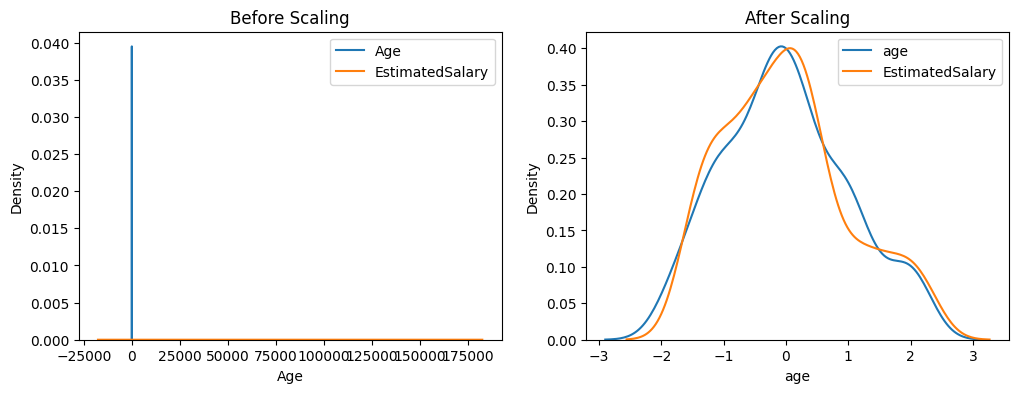

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1, label='Age')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')
ax1.legend()

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['age'], ax=ax2, label='age')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, label='EstimatedSalary')
ax2.legend()

plt.show()

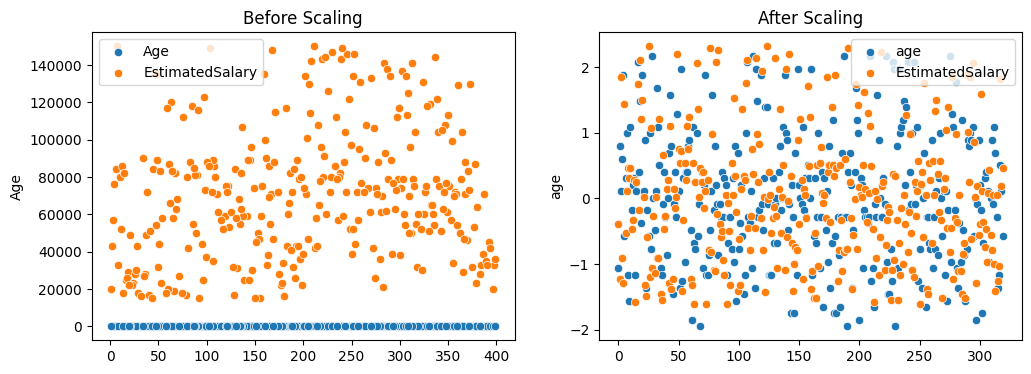

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

ax1.set_title('Before Scaling')
sns.scatterplot(x_train['Age'], ax=ax1, label='Age')
sns.scatterplot(x_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')
ax1.legend()

ax2.set_title('After Scaling')
sns.scatterplot(x_train_scaled['age'], ax=ax2, label='age')
sns.scatterplot(x_train_scaled['EstimatedSalary'], ax=ax2, label='EstimatedSalary')
ax2.legend()

plt.show()